<a href="https://colab.research.google.com/github/Saultr21/IA-Y-BIGDATA/blob/main/M2D/Whisper/Whisper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saúl Tomás Trujillo Rodríguez

# Instalación de Librerías y Dependencias Básicas

En este bloque se instalan todas las dependencias necesarias para el proyecto:

- **Transformers:** Para utilizar modelos de Hugging Face.
- **Torch:** Base de PyTorch para operaciones de deep learning.
- **FFmpeg:** Para la manipulación y conversión de archivos de audio.
- **Datasets:** Librería auxiliar para el manejo de datos.
- **yt-dlp:** Para descargar y extraer audio (por ejemplo, de YouTube).

In [ ]:
# Instalamos las librerías necesarias
!pip install transformers  # Para usar modelos de Hugging Face
!pip install torch         # Librería base de PyTorch
!apt-get install ffmpeg    # Para manipular y convertir archivos de audio
!pip install datasets      # Librería auxiliar para manejo de datos
!pip install yt-dlp
!apt-get install ffmpeg -y
!pip install language_tool_python

# Instalación del Modelo Whisper de OpenAI

En este bloque se instala la versión más reciente de **Whisper** directamente desde el repositorio oficial de GitHub de OpenAI. Esto garantiza que se cuente con la última versión disponible para la transcripción de audio.


In [ ]:
!pip install git+https://github.com/openai/whisper.git  # Instala Whisper de OpenAI

# Importación de Librerías

En este bloque se importan los módulos necesarios para:

- **whisper:** Cargar y utilizar el modelo de transcripción.
- **os:** Interactuar con el sistema operativo (gestión de archivos, etc.).
- **language_tool_python:** Posible uso en corrección gramatical o análisis del lenguaje.
- **difflib:** Para comparar textos.
- **files (de google.colab):** Permitir la subida de archivos locales.


In [10]:
import whisper
import os
import language_tool_python
import difflib
import matplotlib.pyplot as plt
from google.colab import files

# Selección del Método de Carga del Audio

Este bloque interactúa con el usuario para elegir cómo obtener el audio a transcribir. Se ofrecen dos opciones:

1. **Subir un archivo local (WAV o MP3):**
   - El usuario sube un archivo.
   - Si el archivo es WAV, se convierte a MP3 usando FFmpeg.
   - Si el archivo es MP3, se renombra a `audio.mp3`.

2. **Descargar audio desde YouTube:**
   - Se solicita la URL de un video de YouTube.
   - Con *yt-dlp* se descarga y extrae el audio en formato MP3.
   - Se renombra el archivo descargado a `audio.mp3`.

Si el usuario ingresa una opción no válida, se muestra un mensaje de error.


In [6]:
# =========================
# SELECCIÓN DE MÉTODO DE CARGA
# =========================
print("Seleccione la opción:")
print("1: Subir un archivo local (WAV o MP3)")
print("2: Descargar audio de YouTube")
option = input("Ingrese 1 o 2: ")

if option.strip() == '1':
    # -----------------------------------
    # SUBIDA Y CONVERSIÓN DE ARCHIVO LOCAL
    # -----------------------------------
    print("Por favor, sube tu archivo de audio (WAV o MP3).")
    uploaded = files.upload()
    # Se extrae el nombre del primer archivo subido
    filename = list(uploaded.keys())[0]

    if filename.lower().endswith('.wav'):
        print("El archivo subido es WAV. Convirtiendo a MP3...")
        !ffmpeg -i "{filename}" -vn -ar 44100 -ac 2 -b:a 192k "audio.mp3"
        print("Conversión completa. Archivo guardado como audio.mp3")
    elif filename.lower().endswith('.mp3'):
        print("El archivo subido es MP3. No se requiere conversión.")
        !mv "{filename}" "audio.mp3"
        print("Archivo renombrado a audio.mp3")
    else:
        print("Formato no reconocido (no es WAV ni MP3). Se mantiene el nombre original.")
        print(f"Archivo: {filename}")

elif option.strip() == '2':
    # -----------------------------------
    # DESCARGAR AUDIO DESDE YOUTUBE CON yt-dlp
    # -----------------------------------
    video_url = input("Ingresa la URL del video de YouTube: ")
    output_name = "audio.mp3"

    print("Descargando y convirtiendo audio desde YouTube...")
    # Se descarga y extrae el audio en formato MP3
    !yt-dlp -x --audio-format mp3 -o "{output_name}.%(ext)s" {video_url}

    # Aseguramos que el archivo final se llame 'audio.mp3'
    !mv "{output_name}.mp3" "audio.mp3"

    print("Descarga y conversión completadas. Archivo guardado como audio.mp3")
else:
    print("Opción no válida. Por favor, reinicie el proceso y seleccione 1 o 2.")


Seleccione la opción:
1: Subir un archivo local (WAV o MP3)
2: Descargar audio de YouTube
Ingrese 1 o 2: 2
Ingresa la URL del video de YouTube: https://www.youtube.com/watch?v=PWmJhh_qTSY
Descargando y convirtiendo audio desde YouTube...
[youtube] Extracting URL: https://www.youtube.com/watch?v=PWmJhh_qTSY
[youtube] PWmJhh_qTSY: Downloading webpage
[youtube] PWmJhh_qTSY: Downloading tv client config
[youtube] PWmJhh_qTSY: Downloading player c8dbda2a
[youtube] PWmJhh_qTSY: Downloading tv player API JSON
[youtube] PWmJhh_qTSY: Downloading ios player API JSON
[youtube] PWmJhh_qTSY: Downloading m3u8 information
[info] PWmJhh_qTSY: Downloading 1 format(s): 251
[download] Destination: audio.mp3.webm
[download] 100% of    2.94MiB in 00:00:00 at 63.41MiB/s
[ExtractAudio] Destination: audio.mp3.mp3
Deleting original file audio.mp3.webm (pass -k to keep)
Descarga y conversión completadas. Archivo guardado como audio.mp3


# Carga del Modelo y Transcripción del Audio

En este bloque se realiza el procesamiento principal:

1. **Carga del Modelo:**  
   Se carga la versión "base" del modelo Whisper de OpenAI para la transcripción.

2. **Transcripción:**  
   Se utiliza el método `transcribe` para convertir el archivo `audio.mp3` en texto, mostrando información en tiempo real gracias al modo verbose.

3. **Guardar Resultado:**  
   La transcripción se guarda en un archivo llamado `transcripcion.txt` para su posterior consulta.


In [7]:
# Carga del modelo
model = whisper.load_model("base")

# Transcripción con salida en tiempo real (modo verbose)
result = model.transcribe("audio.mp3", verbose=True)

# Guardamos la transcripción final en un archivo .txt
with open("transcripcion.txt", "w", encoding="utf-8") as f:
    f.write(result["text"])

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 106MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: Spanish
[00:00.000 --> 00:25.000]  Enseñaste que la amor no es una estafa y que cuando es real no se acaba
[00:25.000 --> 00:35.000]  Intenta que no me voy a llorar que no dejas mi fragilidad pero las cosas no son siempre como las soñamos
[00:35.000 --> 00:42.000]  A veces corremos pero no llegamos nunca dudas que aquí voy a estar
[00:42.000 --> 00:54.000]  Abra me que te voy a escuchar y aunque la vida me trataras así voy a ser fuerte solo para ti
[00:54.000 --> 01:05.000]  Lo único que quieres tu felicidad y estar contigo, no sonrisa tu y es mi debilidad
[01:05.000 --> 01:16.000]  Quédate si le dan este deseador, así que me siento mejor para lo que necesites estoy
[01:16.000 --> 01:21.000]  Tienes que estar completado que yo
[01:22.000 --> 01:26.000]  Se nos rompió solo un plato, no toda la bajivilla
[01:26.000 --> 01:32.000]  Aunque no se pone la otra mejilla prendera per

# Comparación con una Letra de Referencia

En este apartado, se le permite al usuario ingresar una letra (transcripción de referencia) para comparar con la transcripción generada.  
Se utiliza la librería difflib para calcular un índice de similitud y mostrar las diferencias entre ambos textos.



Si deseas comparar la transcripción con una letra de referencia, ingrésala a continuación (o presiona Enter para omitir):
Me enseñaste que el amor no es una estafa, y que cuando es real no se acaba Intenté que no me veas llorar, que no vieras mi fragilidad, pero Las cosas no son siempre como las soñamos A veces corremos, pero no llegamos Nunca dudes que aquí voy a estar  Háblame que te voy a escuchar…  Y aunque la vida me tratara así Voy a ser fuerte solo para ti  Lo único que quiero es tu felicidad  Y estar contigo La sonrisa tuya es mi debilidad Quererte  Sirve de anestesia al dolor Hace que me sienta mejor Para lo que necesites estoy Viniste a completar lo que soy  Se nos rompió solo un plato no toda la vajilla,  Y aunque no sé poner la otra mejilla Aprender a perdonar es de sabios,  Que solo te salga amor de esos labios Si las cosas se dañan no se botan, se reparan,  los problemas se afrontan y se encaran Hay que reírse de la vida A pesar de que duelan las heridas  Si ha de entreg

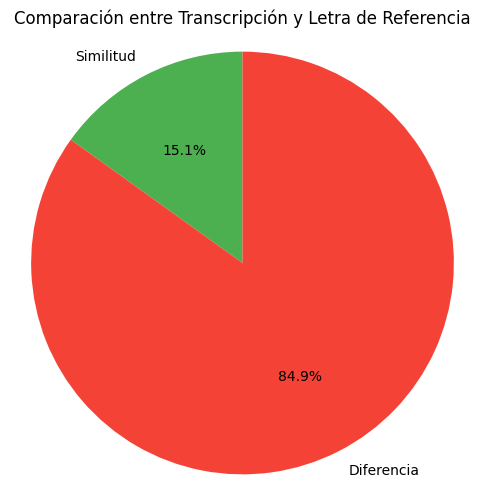

In [11]:
# =========================
# COMPARACIÓN CON UNA LETRA DE REFERENCIA
# =========================
ref = input("\nSi deseas comparar la transcripción con una letra de referencia, ingrésala a continuación (o presiona Enter para omitir):\n")
if ref.strip():
    # Calculamos la similitud entre la transcripción y la letra de referencia
    similarity = difflib.SequenceMatcher(None, result["text"], ref).ratio()
    similarity_percentage = round(similarity * 100, 2)
    difference_percentage = round(100 - similarity_percentage, 2)

    print("\nComparación con la Letra de Referencia:")
    print(f"Índice de similitud: {similarity_percentage}%")

    # Opcional: Mostrar diferencias detalladas (como diff)
    diff = difflib.unified_diff(
        result["text"].splitlines(),
        ref.splitlines(),
        fromfile='Transcripción generada',
        tofile='Letra de referencia',
        lineterm=''
    )
    print("\nDiferencias (vista resumida):")
    for line in diff:
        print(line)

    # Generamos un gráfico de pastel para visualizar la similitud
    labels = ['Similitud', 'Diferencia']
    sizes = [similarity_percentage, difference_percentage]
    colors = ['#4CAF50', '#F44336']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Comparación entre Transcripción y Letra de Referencia')
    plt.axis('equal')
    plt.show()
else:
    print("No se proporcionó una letra de referencia para comparar.")

# Corrección y Comparación de Transcripciones

Este código tiene tres partes principales:

---

## 1. Función para Calcular el Word Error Rate (WER)

La función `compute_wer(reference, hypothesis)` mide el error a nivel de palabras entre dos textos (por ejemplo, una transcripción y una letra de referencia).  
---

## 2. Corrección Automática de la Transcripción

En esta sección se utiliza la librería `language_tool_python` para mejorar la transcripción generada por Whisper:
- **Inicialización del corrector:**  
  Se crea una instancia de `LanguageTool` configurada para el idioma español (`'es'`).
- **Aplicación de la corrección:**  
  Se corrige la transcripción almacenada en `result["text"]` y se guarda el resultado en `improved_transcription`.
- **Salida en consola:**  
  Se imprimen la transcripción original y la transcripción mejorada para compararlas visualmente.

---

## 3. Comparación con la Letra de Referencia

Esta parte permite al usuario comparar la transcripción (tanto la original como la mejorada) con una letra de referencia:
- **Entrada del usuario:**  
  Se solicita al usuario que ingrese la letra de referencia mediante `input()`.  
- **Cálculo del WER:**  
  - Se calcula el WER entre la letra de referencia y la transcripción original.
  - Se calcula el WER entre la letra de referencia y la transcripción mejorada.
- **Impresión de resultados:**  
  Se muestran ambos valores de WER (en porcentaje) para ver el impacto de la corrección.
- **Visualización gráfica:**  
  Se genera un gráfico de barras (usando `matplotlib`) que compara visualmente el WER de la transcripción original y la corregida. Cada barra se etiqueta y se muestra el porcentaje correspondiente.

---



Transcripción original:
 Enseñaste que la amor no es una estafa y que cuando es real no se acaba Intenta que no me voy a llorar que no dejas mi fragilidad pero las cosas no son siempre como las soñamos A veces corremos pero no llegamos nunca dudas que aquí voy a estar Abra me que te voy a escuchar y aunque la vida me trataras así voy a ser fuerte solo para ti Lo único que quieres tu felicidad y estar contigo, no sonrisa tu y es mi debilidad Quédate si le dan este deseador, así que me siento mejor para lo que necesites estoy Tienes que estar completado que yo Se nos rompió solo un plato, no toda la bajivilla Aunque no se pone la otra mejilla prendera perdonar este sabiós Mi solo te salga a mordas sus labios si las cosas se dan y no se votan Se repara los problemas se afrontan y se encara a querrérse de la vida a pesar de que vuelan las heridas Si han trebalo entre el corazón aunque le aguantan los sin razón Lo único que quieres tu felicidad y estar contigo, no sonrisa tu y es mi debili

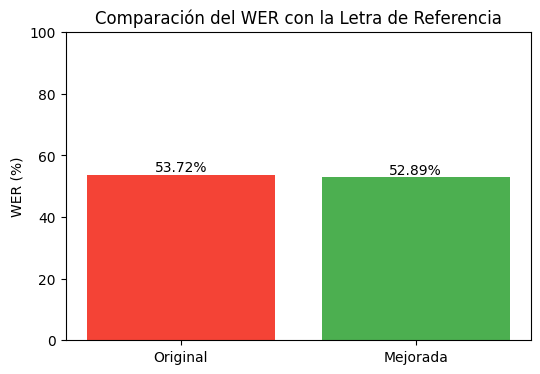

In [18]:
# Función para calcular el Word Error Rate (WER)
def compute_wer(reference, hypothesis):
    ref_words = reference.split()
    hyp_words = hypothesis.split()
    d = [[0] * (len(hyp_words) + 1) for _ in range(len(ref_words) + 1)]
    for i in range(len(ref_words) + 1):
        d[i][0] = i
    for j in range(len(hyp_words) + 1):
        d[0][j] = j
    for i in range(1, len(ref_words) + 1):
        for j in range(1, len(hyp_words) + 1):
            cost = 0 if ref_words[i - 1] == hyp_words[j - 1] else 1
            d[i][j] = min(d[i - 1][j] + 1,      # eliminación
                          d[i][j - 1] + 1,      # inserción
                          d[i - 1][j - 1] + cost)  # sustitución
    return d[-1][-1] / len(ref_words)

# CORRECCIÓN AUTOMÁTICA DE LA TRANSCRIPCIÓN
# =========================
# Inicializamos la herramienta para el idioma español (puedes cambiarlo según el idioma)
tool = language_tool_python.LanguageTool('es')
# Aplicamos la corrección automática
improved_transcription = tool.correct(result["text"])

print("\nTranscripción original:")
print(result["text"])
print("\nTranscripción mejorada (después de la corrección automática):")
print(improved_transcription)

# =========================
# COMPARACIÓN CON LA LETRA DE REFERENCIA
# =========================
# Se solicita al usuario la letra de referencia para comparar
ref = input("\nIngresa la letra de referencia para comparar (o presiona Enter para omitir):\n")

if ref.strip():
    wer_original = compute_wer(ref, result["text"])
    wer_improved = compute_wer(ref, improved_transcription)

    print("\nComparación con la letra de referencia:")
    print("WER (Transcripción original vs. referencia):", round(wer_original * 100, 2), "%")
    print("WER (Transcripción mejorada vs. referencia):", round(wer_improved * 100, 2), "%")

    # Visualización gráfica (gráfico de barras)
    labels = ['Original', 'Mejorada']
    wer_values = [wer_original * 100, wer_improved * 100]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, wer_values, color=['#F44336', '#4CAF50'])
    plt.ylabel('WER (%)')
    plt.title('Comparación del WER con la Letra de Referencia')
    plt.ylim(0, 100)
    for i, v in enumerate(wer_values):
        plt.text(i, v + 1, f"{v:.2f}%", ha='center')
    plt.show()
else:
    print("No se proporcionó una letra de referencia para comparar.")

# Conclusión

Al aplicarle el `language_tool_python.LanguageTool` se consigue mejorar ligeramente la letra, sobretodo en errores ortográficos, pero lo que no va a mejorar es palabras faltantes o mal interpretadas.